## Data Science Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

0. Environment
1. Check libraries version
2. Import Libraries
3. Question or problem definition.
4. Acquire dataset or training and testing data.
5. Wrangle, prepare, cleanse the data.
6. **Analyze, identify patterns, and explore the data**.
7. Model, predict and solve the problem.
8. Visualize, report, and present the problem solving steps and final solution.
9. Supply or submit the results.
10. Create or solve AI pipeline on Cloud, architecture solution.

Could be to exist another substeps during Data Processing and Data Modeling, for to train and deploy many machine learning and/or deep learning combination pipelines.

***

## 6. Analysis and Patterns recognizition

As a human, we can just visualize anything in either in 2-d or 3-d. But trust me almost of the data that you obtain in real world won’t be this way. As a Machine learning engineer, working with more than 1000-dimensional data is very common. So what can we do in such cases where data is more than 3D ? There are some Dimensionality Reduction(DR) techniques like PCA, TSNE , LDA etc which helps you to convert data from a higher dimension to a 2D or 3D data in order to visualize them. There may be some loss of information with each DR techniques, but only they can help us visualize very high dimensional data on a 2d plot. TSNE is one of the state of the art DR technique employed for visualization of high dimensional data.
From perspective of building models , By visualizing the data we can find the hidden patterns, Explore if there are any clusters within data and we can find if they are linearly separable/too much overlapped etc. From this initial analysis we can easily rule out the models that won’t be suitable for such a data and we will implement only the models that are suitable, without wasting our valuable time and the computational resources.
This part of data visualization is a predominant one in initial Exploratory Data Analysis (EDA) on the field of Data science/ML.

There may be several languages on which we can perform the Data Visualization, but the ones that are much widely used in the field of Data Science are Python & R. So your next question may be, Which one to learn and which one has a better scope ?. The answer is simple! It’s purely your choice ;) . ‘R’ is way more statistical language and has several great packages for Data science applications, whereas Python on the other hand is widely used in general purpose programming as well as for Data science and ML related applications. I am pretty comfortable with python and so I will continue the rest of the blog with python codes and also it has several good packages like Scikit,Matplotlib,seaborn etc which helps us a lot and a special thanks to those developers who made our work simple.

## 1. Check the versions of libraries

My check of the versions of libraries on differents frameworks and environment, like as MacOS, Win10, Ubuntu-Linux, etc. with the scope to find incongruence or deprecated modules during all the workflow.

In [1]:
# Check the versions of libraries on Win10

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


***

## 2. Import Libraries and modules

We seperate different libraries and modules per workflow block or step.

In [2]:
# Install dependencies plotly
#!pip install plotly
#!pip install altair

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib
import os


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import  Image
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import altair as alt

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***

## 3. Load dataset

Only if we use different way to load dataset from cloud storage, google drive or locally, we develop different chunks or API connection.

In [4]:
# Load dataset
data_1 = pd.read_csv('df2c_1.csv')
data_1.head(10)

,Obs,Sales,PhoneType,Email,NumberofCampaigns,ProdActive,ProdBought,Premium Offered,Phone Call Day,CodeCategory,...,HouseInsurance_imp_z,HouseInsurance_impGrp,Income_imp_z,Income_impGrp,PensionPlan_imp_z,PensionPlan_impGrp,Savings_imp_z,Savings_impGrp,Credit_imp_z,Credit_impGrp
0,1,0,FIXED / LAND PHONE,0,2,0,0,11.12,Wednesday,Not Interested,...,4.185978,>10k,4.743570,40-60k,4.885910,50-100k,0.000000,up_25k,4.545889,25-50k
1,2,1,MOBILE PHONE,0,2,0,1,11.12,Thursday,Sale,...,3.542275,2.5-5k,4.444890,25-40k,4.256173,up_25k,0.000000,up_25k,3.910255,up_25k
2,3,0,FIXED / LAND PHONE,0,2,0,0,14.50,Thursday,Not Interested,...,4.143366,>10k,5.037198,>100k,4.843728,50-100k,11.492843,50-100k,4.503524,25-50k
3,4,0,MOBILE PHONE,0,2,0,0,14.50,Wednesday,Not Interested,...,3.904532,7.5-10k,4.800533,60-80k,4.608251,25-50k,0.000000,up_25k,4.266620,up_25k
4,5,0,MOBILE PHONE,0,2,0,0,14.50,Wednesday,Not Interested,...,3.723747,5-7.5k,4.441467,25-40k,5.253169,100-250k,0.000000,up_25k,3.967138,up_25k
5,6,1,MOBILE PHONE,1,6,2,2,14.50,Thursday,Sale,...,4.179672,>10k,4.755132,40-60k,4.405511,25-50k,0.000000,up_25k,4.285940,up_25k
6,7,0,FIXED / LAND PHONE,0,2,0,0,11.12,Tuesday,Ineligible,...,3.658577,2.5-5k,4.558458,25-40k,4.368277,up_25k,0.000000,up_25k,4.024120,up_25k
7,8,0,FIXED / LAND PHONE,0,2,0,0,14.50,Friday,Ineligible,...,4.035430,>10k,4.379613,up_25k,4.100222,up_25k,10.758179,25-50k,4.352077,up_25k
8,9,0,FIXED / LAND PHONE,0,2,0,0,14.50,Thursday,Not Interested,...,3.592812,2.5-5k,5.181824,>100k,4.439234,25-50k,10.785689,25-50k,4.650071,25-50k
9,10,0,MOBILE PHONE,0,2,0,0,14.50,Sunday,Not Call,...,4.075423,>10k,4.605531,40-60k,4.414846,25-50k,0.000000,up_25k,4.071295,up_25k


In [5]:
data_1.columns

Index(['Obs', 'Sales', 'PhoneType', 'Email', 'NumberofCampaigns', 'ProdActive',
       'ProdBought', 'Premium Offered', 'Phone Call Day', 'CodeCategory',
       'Product Type', 'Number of Semesters Paid', 'Socieconomic Status',
       'Province', 'Right Address', 'Living Area (m^2)',
       'Estimated number of cars', 'Probability of Second Residence',
       'Number of Mobile Phones', 'Number of Fixed Lines', 'ADSL',
       '3G Devices', 'Type of House', 'new_PhoneCallDay', 'House Price_imp',
       'Income_imp', 'House Insurance_imp', 'Pension Plan_imp', 'Credit_imp',
       'Savings_imp', 'tenureYrs', 'tenureYrs_z', 'tenureGrp', 'ageYrs',
       'ageGrp', 'builtYrs', 'builtYrs_z', 'builtYrsGrp', 'livingArea_z',
       'livingAreaGrp', 'HousePrice_imp_z', 'HousePrice_impGrp',
       'HouseInsurance_imp_z', 'HouseInsurance_impGrp', 'Income_imp_z',
       'Income_impGrp', 'PensionPlan_imp_z', 'PensionPlan_impGrp',
       'Savings_imp_z', 'Savings_impGrp', 'Credit_imp_z', 'Credit_impGrp

***

## 4. Data Visualization


In [6]:
# Evaluate as absolute values on Sales by Premium Offered
pd.crosstab(index=data_1["Premium Offered"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
Premium Offered,,,
11.12,6585,615,7200
14.5,10383,924,11307
21.85,1317,176,1493
All,18285,1715,20000


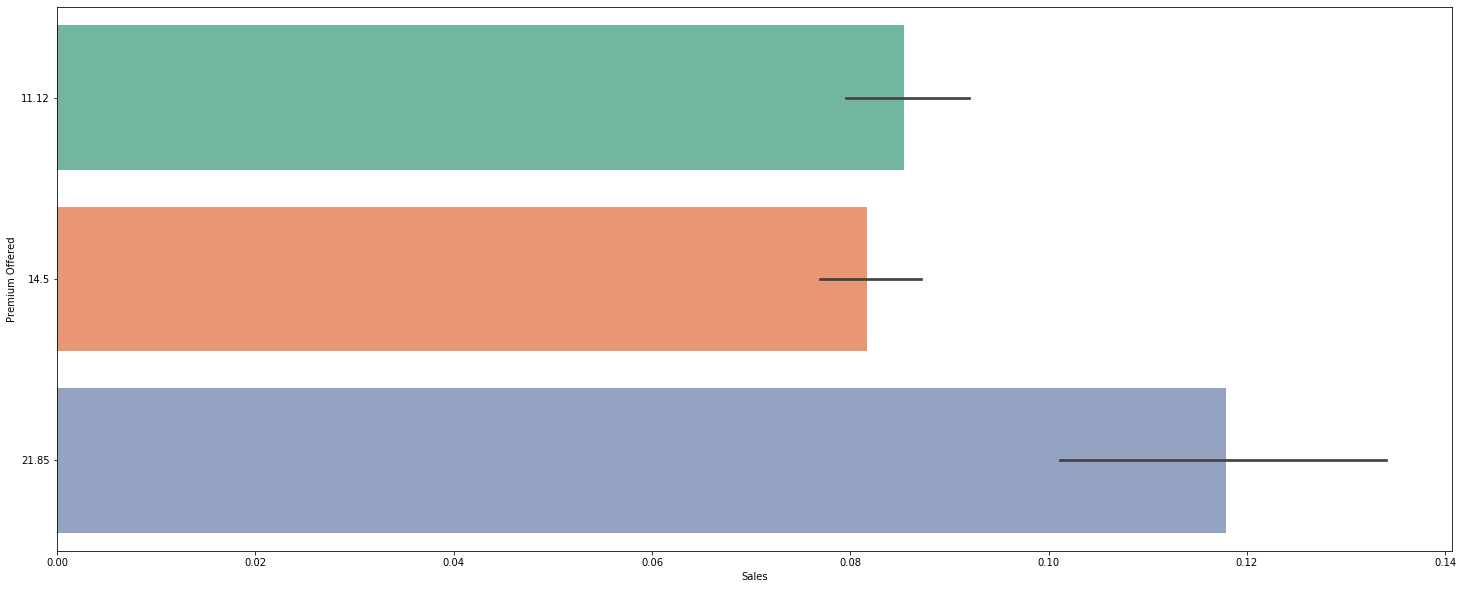

In [7]:
# Plot the frequency of Premium offered
plt.figure(figsize= [25, 10])
sns.barplot(y="Premium Offered", x="Sales", data=data_1, 
            palette="Set2", orient="h")

> We have `8%` premium offered for **11.12** and **14.5** product, instead **21.85** has ~12% sales made.

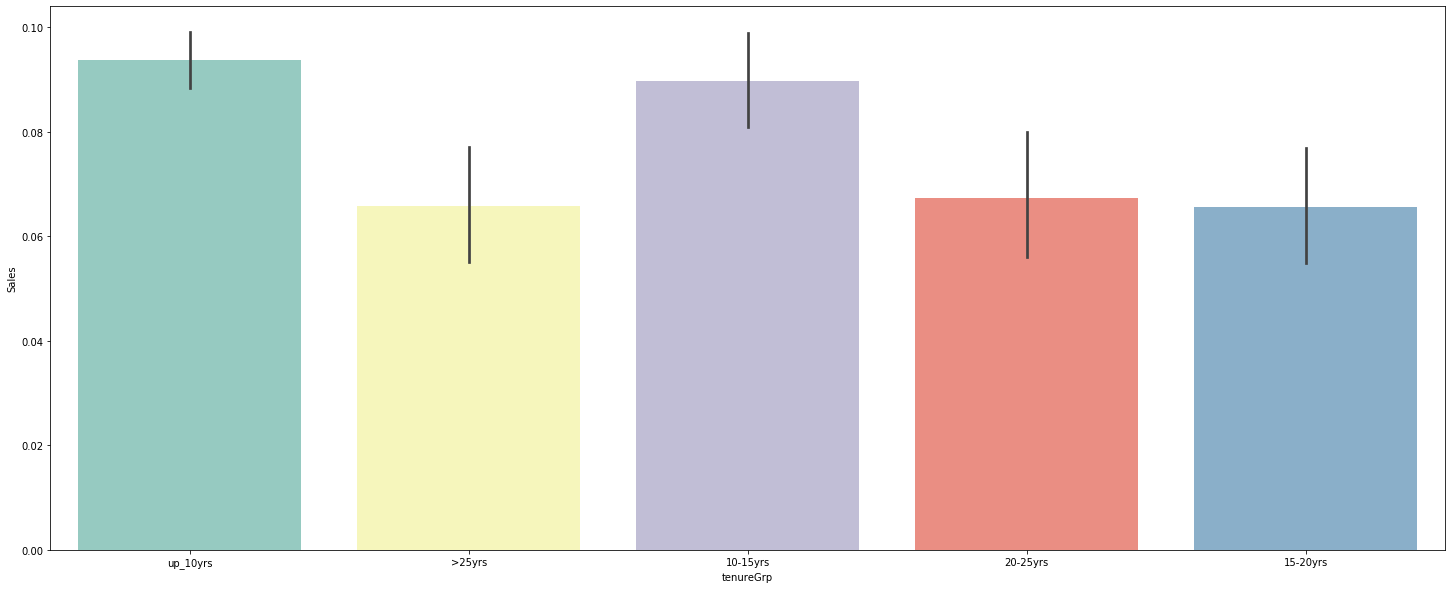

In [8]:
# Plot the distribution
plt.figure(figsize= [25, 10])
sns.barplot(x="tenureGrp", y="Sales", data=data_1, palette="Set3")
plt.show()

> Sales made by customers up 10 and 15 years of tenures.

In [9]:
# Evaluate NumberofCampaigns and Sales as absolute values
pd.crosstab(index=data_1["NumberofCampaigns"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
NumberofCampaigns,,,
2,12582,1134,13716
4,2361,158,2519
6,2411,259,2670
8,58,10,68
10,57,10,67
12,61,8,69
14,70,12,82
16,108,25,133
18,152,24,176


In [10]:
# Evaluate NumberofCampaigns and Sales as relatives values on Sold only
data_1[["NumberofCampaigns", "Sales"]].groupby(['NumberofCampaigns'], as_index=False).mean()

,NumberofCampaigns,Sales
0,2,0.082677
1,4,0.062723
2,6,0.097004
3,8,0.147059
4,10,0.149254
5,12,0.115942
6,14,0.146341
7,16,0.187970
8,18,0.136364
9,20,0.239583


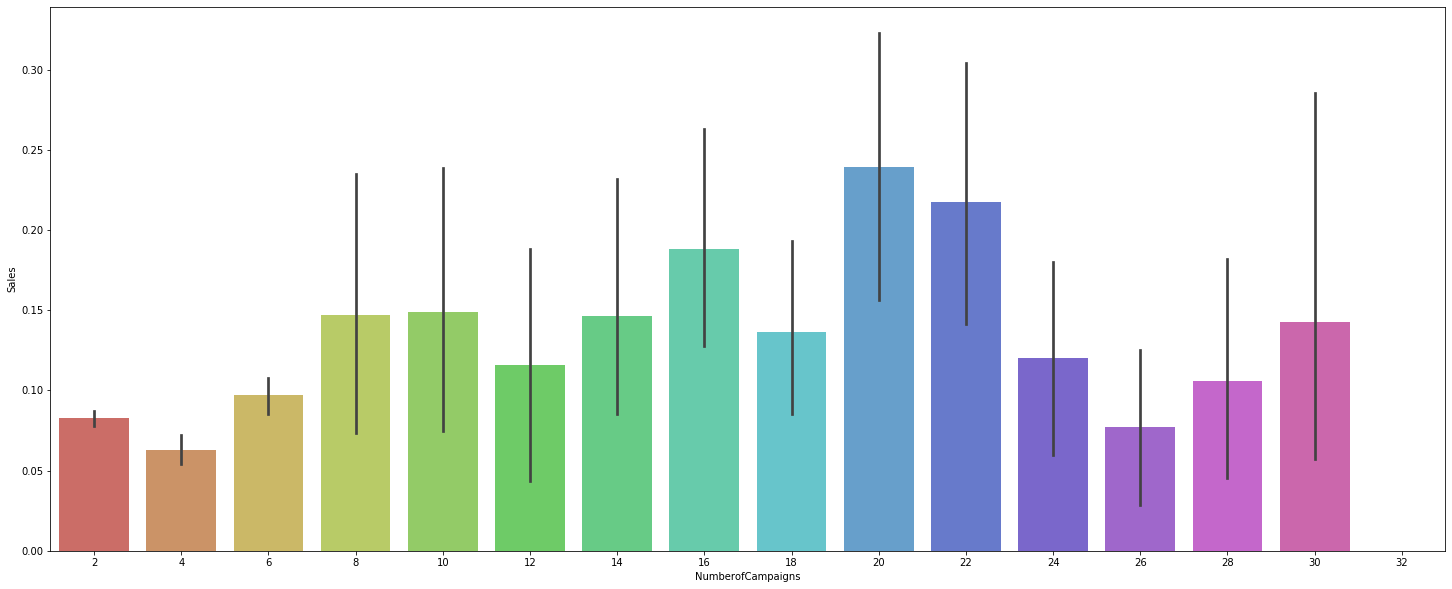

In [11]:
# Plot the distribution
plt.figure(figsize= [25, 10])
#sns.palplot(sns.color_palette("hls", 8))
sns.barplot(x="NumberofCampaigns", y="Sales", data=data_1, palette="hls")
plt.show()

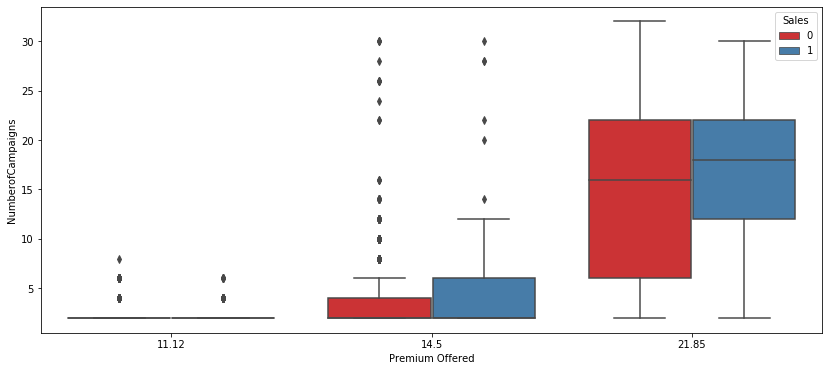

In [12]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Premium Offered", y="NumberofCampaigns", hue="Sales", data=data_1, palette="Set1")
plt.show()

> A minimum of 20 campaigns are required for us to have a sale, in addition, it would be interesting to study the marketing actions, costs and return, actions and strategies to improve this aspect. Optimizing a CRM model is not only closed to predicting sales, but how we are acting and how we can transfer the information to all departments (or external collaborators).

> Premium product `21.85` is the most sold in campaigns.

In [13]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["ProdActive"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
ProdActive,,,
0,18061,1005,19066
1,193,667,860
2,30,38,68
3,1,5,6
All,18285,1715,20000


In [14]:
# Evaluate ProdActive and Sales as relatives values on Sold only
data_1[["ProdActive", "Sales"]].groupby(['ProdActive'], as_index=False).mean()

,ProdActive,Sales
0,0,0.052712
1,1,0.775581
2,2,0.558824
3,3,0.833333


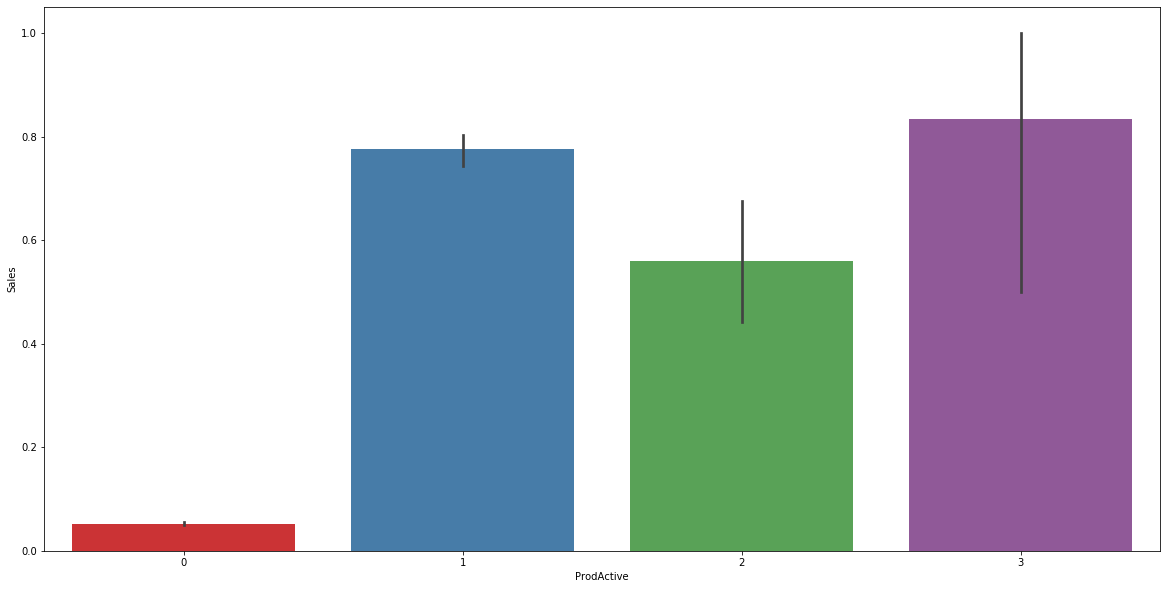

In [15]:
# Plot the distribution
plt.figure(figsize= [20.0, 10.0])
sns.barplot(x="ProdActive", y="Sales", data=data_1,
           palette="Set1")
plt.show()

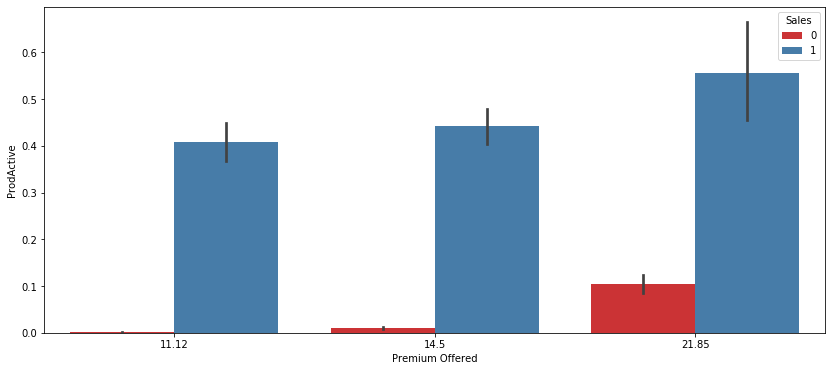

In [16]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.barplot(x="Premium Offered", y="ProdActive", hue="Sales", data=data_1, palette="Set1")
plt.show()

> Same for variable `product active`, the best premium offered `21.85` is the product most sold.

In [17]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["ProdBought"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
ProdBought,,,
0,15546,0,15546
1,1778,1417,3195
2,556,167,723
3,302,95,397
4,91,33,124
5,12,2,14
6,0,1,1
All,18285,1715,20000


In [18]:
# Evaluate ProdBought and Sales as relatives values on Sold only
data_1[["ProdBought", "Sales"]].groupby(['ProdBought'], as_index=False).mean()

,ProdBought,Sales
0,0,0.000000
1,1,0.443505
2,2,0.230982
3,3,0.239295
4,4,0.266129
5,5,0.142857
6,6,1.000000


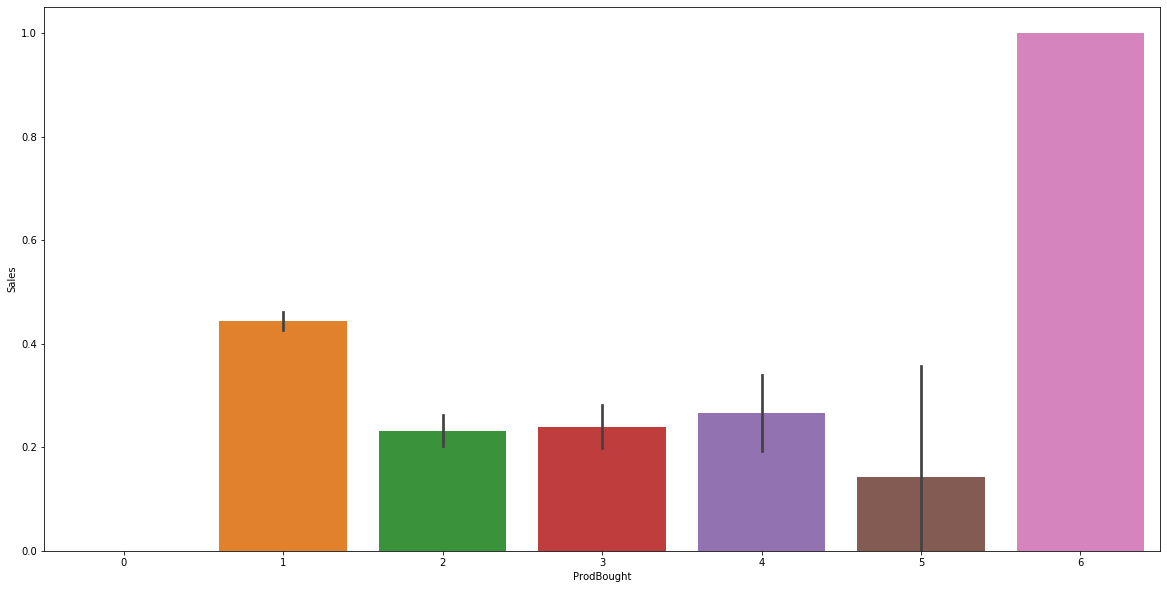

In [19]:
# Plot the distribution on Sales==1
plt.figure(figsize= [20.0, 10.0])
sns.barplot(x="ProdBought", y="Sales", data=data_1)
plt.show()

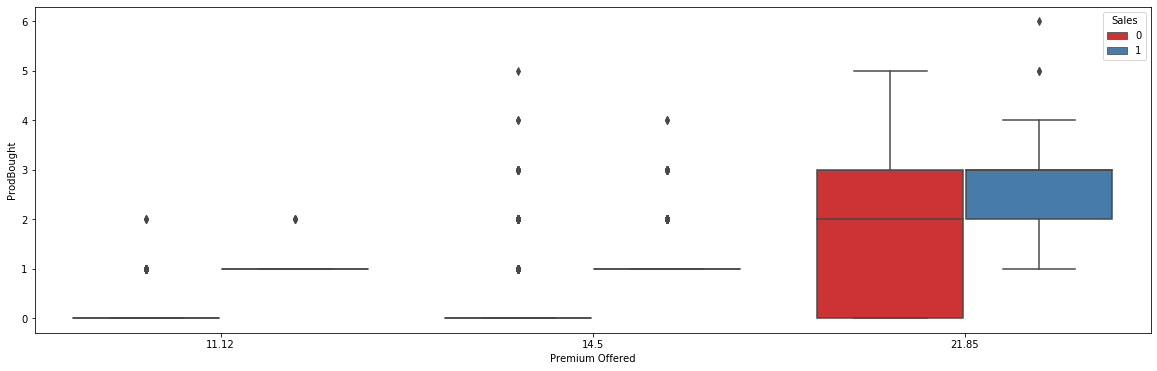

In [20]:
# Grouped boxplot
plt.figure(figsize= [20.0, 6.0])
sns.boxplot(x="Premium Offered", y="ProdBought", hue="Sales", data=data_1, palette="Set1")
plt.show()

In [21]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["new_PhoneCallDay"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
new_PhoneCallDay,,,
Friday,2719,249,2968
Monday,4042,343,4385
Sunday,227,0,227
Thursday,3901,370,4271
Tuesday,3743,381,4124
Wednesday,3653,372,4025
All,18285,1715,20000


In [22]:
# Evaluate Phone Call Day and Sales as relatives values on sold only
data_1[["new_PhoneCallDay", "Sales"]].groupby(['new_PhoneCallDay'], as_index=False).mean()

,new_PhoneCallDay,Sales
0,Friday,0.083895
1,Monday,0.078221
2,Sunday,0.000000
3,Thursday,0.086631
4,Tuesday,0.092386
5,Wednesday,0.092422


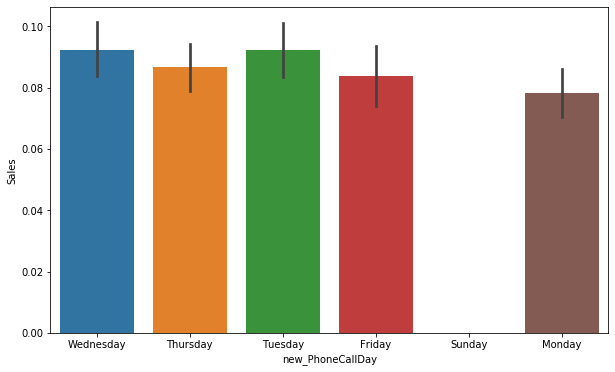

In [23]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="new_PhoneCallDay", y="Sales", data=data_1)
plt.show()

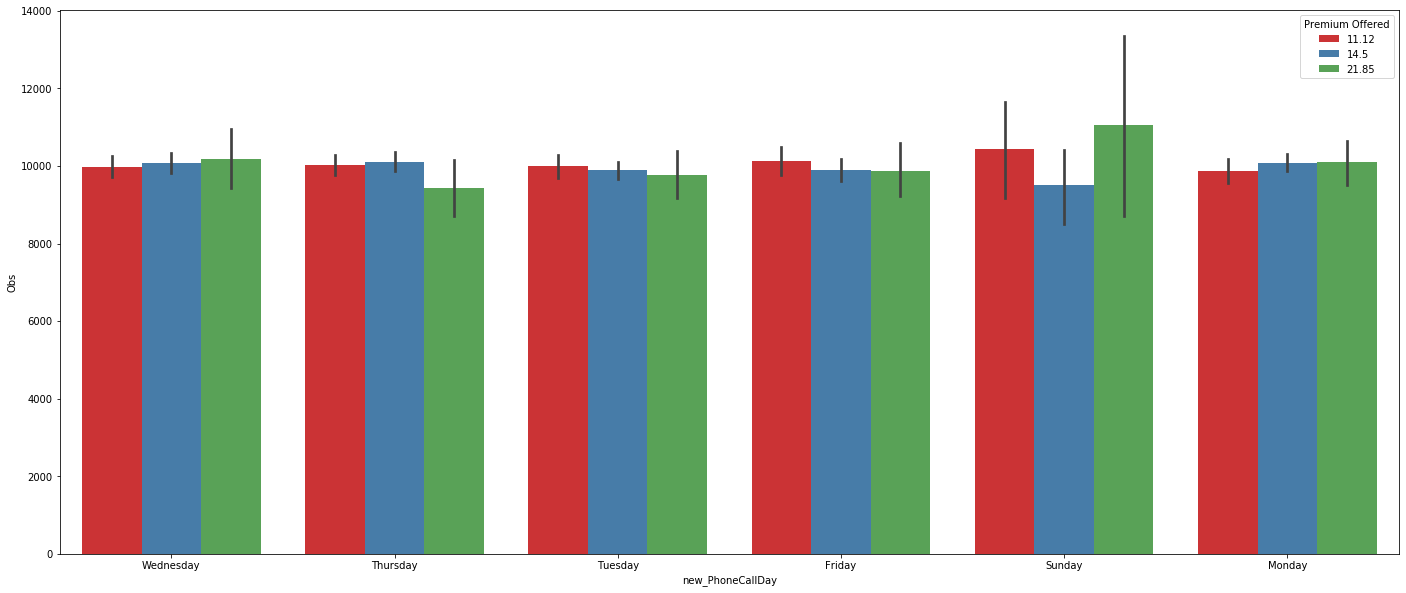

In [24]:
# Grouped boxplot
plt.figure(figsize= [24.0, 10.0])
sns.barplot(x="new_PhoneCallDay",y="Obs", hue="Premium Offered", data=data_1, palette="Set1")
plt.show()

In [25]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["CodeCategory"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
CodeCategory,,,
Cancelled Sale,11,0,11
Ineligible,2410,0,2410
No Longer a Costumer,1164,0,1164
Not Call,733,0,733
Not Interested,13705,0,13705
Refusal,262,0,262
Sale,0,1715,1715
All,18285,1715,20000


In [26]:
# Evaluate Premium Offered and Sales as relatives values on sold only
data_1[["CodeCategory", "Sales"]].groupby(['CodeCategory'], as_index=False).mean()

,CodeCategory,Sales
0,Cancelled Sale,0
1,Ineligible,0
2,No Longer a Costumer,0
3,Not Call,0
4,Not Interested,0
5,Refusal,0
6,Sale,1


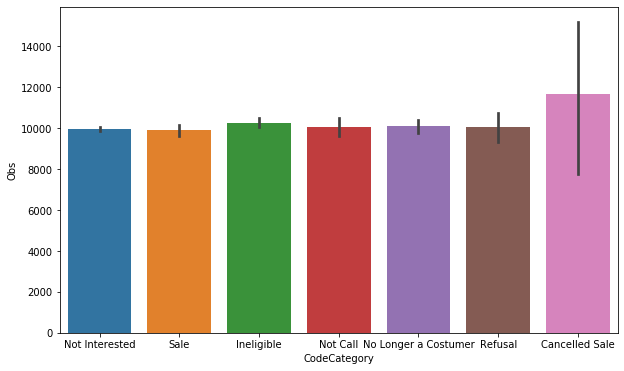

In [27]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="CodeCategory", y="Obs", data=data_1)
plt.show()

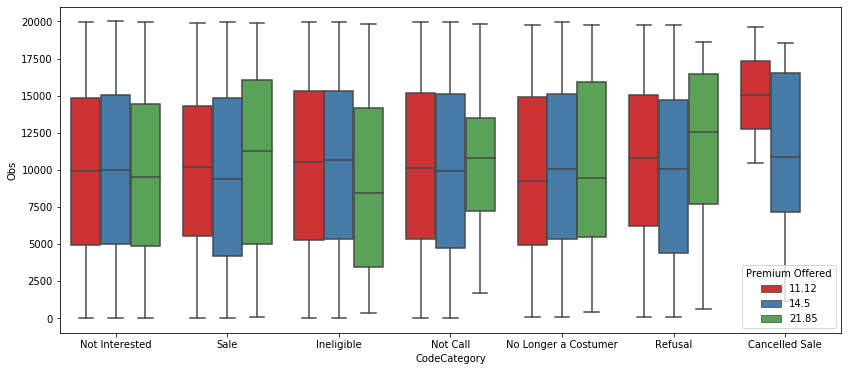

In [28]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="CodeCategory", y="Obs", hue="Premium Offered", data=data_1, palette="Set1")
plt.show()

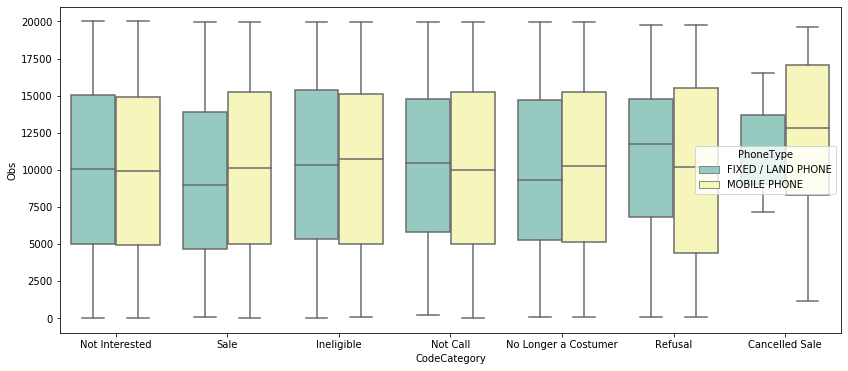

In [29]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="CodeCategory", y="Obs", hue="PhoneType", 
            data=data_1, palette="Set3", )
plt.show()

In [30]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["Product Type"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
Product Type,,,
0,18285,0,18285
A,0,1153,1153
B,0,562,562
All,18285,1715,20000


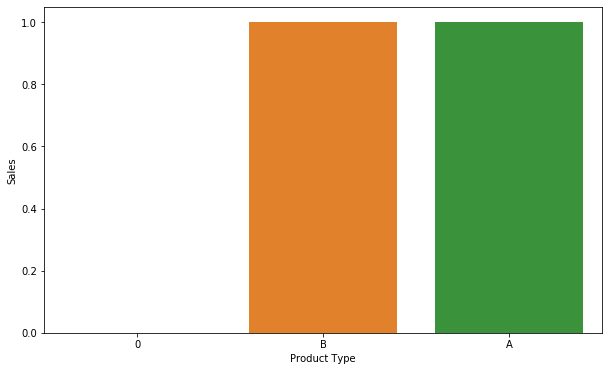

In [31]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Product Type", y="Sales", data=data_1)
plt.show()

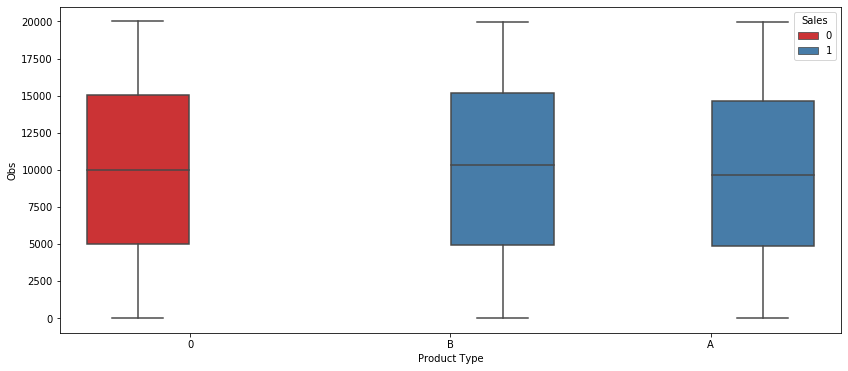

In [32]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Product Type", y="Obs", hue="Sales", data=data_1, palette="Set1")
plt.show()

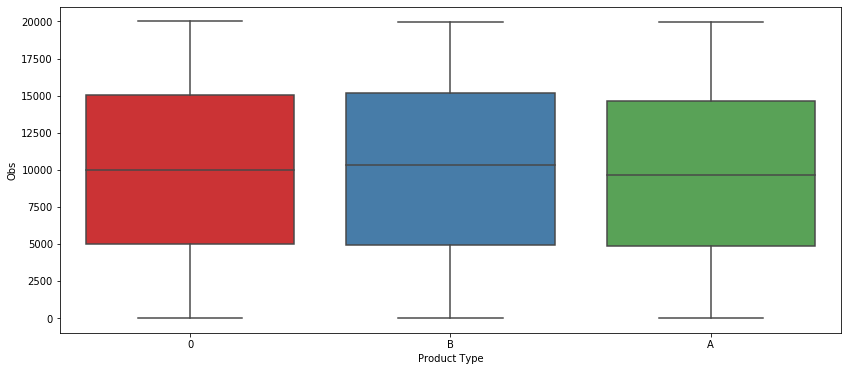

In [33]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Product Type", y="Obs", data=data_1, palette="Set1")
plt.show()

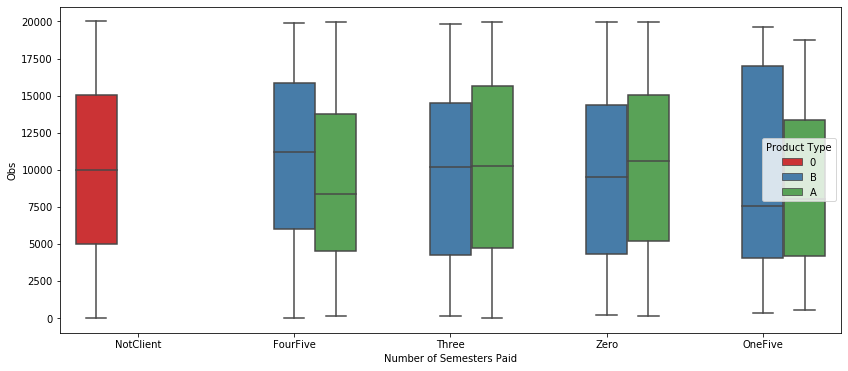

In [34]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Semesters Paid", y="Obs", hue="Product Type", data=data_1, palette="Set1")
plt.show()

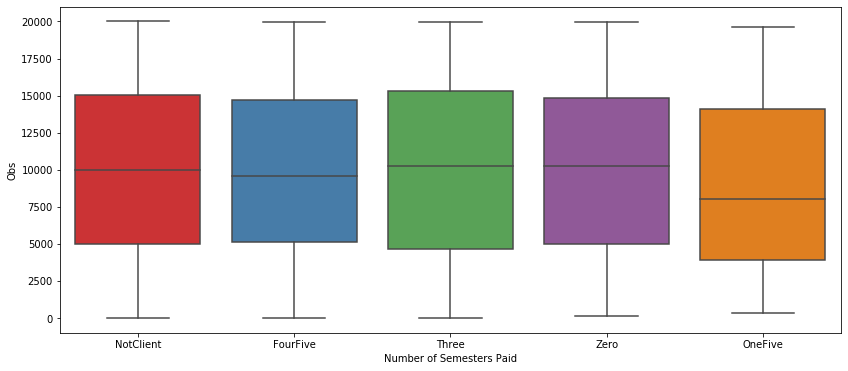

In [35]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Number of Semesters Paid", y="Obs", data=data_1, palette="Set1")
plt.show()

In [36]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["Socieconomic Status"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
Socieconomic Status,,,
High,708,162,870
Low,5101,234,5335
Medium,11833,1113,12946
Very High,643,206,849
All,18285,1715,20000


In [37]:
# Evaluate Premium Offered and Sales as relatives values on sold only
data_1[["Socieconomic Status", "Sales"]].groupby(['Socieconomic Status'], as_index=False).mean()

,Socieconomic Status,Sales
0,High,0.186207
1,Low,0.043861
2,Medium,0.085973
3,Very High,0.242638


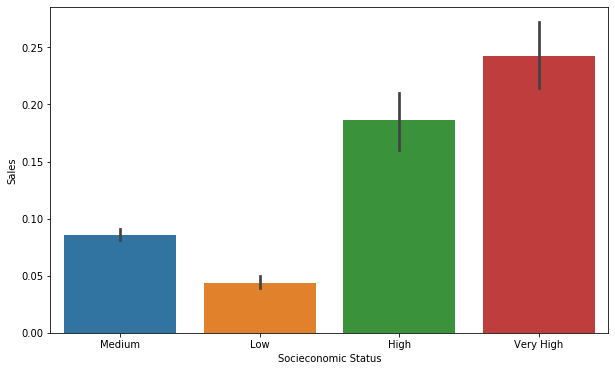

In [38]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Socieconomic Status", y="Sales", data=data_1)
plt.show()

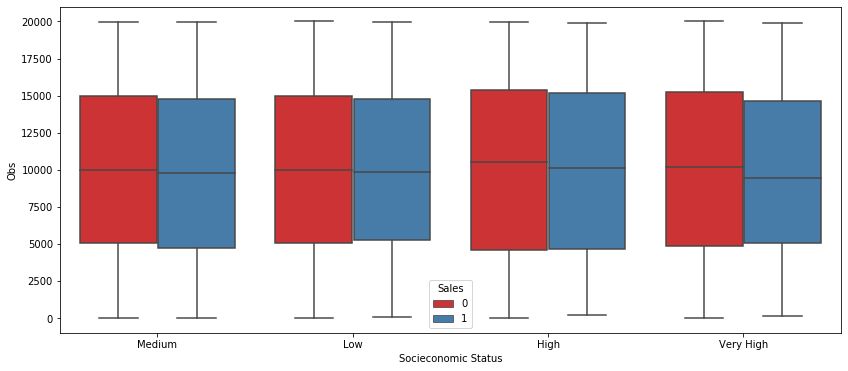

In [39]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Socieconomic Status", y="Obs", hue="Sales", data=data_1, palette="Set1")
plt.show()

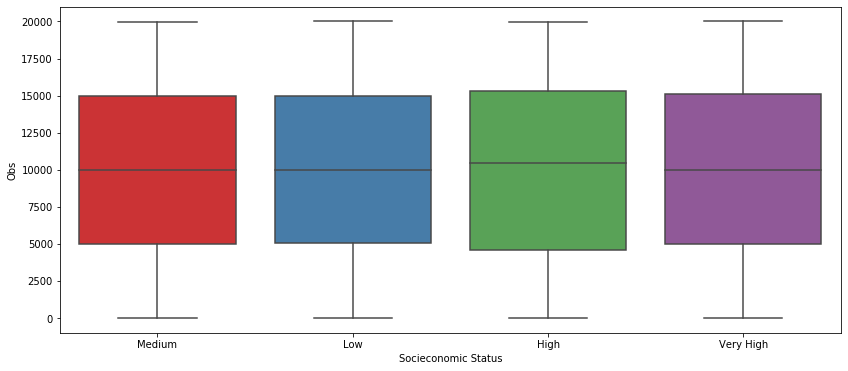

In [40]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Socieconomic Status", y="Obs", data=data_1, palette="Set1")
plt.show()

In [41]:
# Evaluate as absolute values on Sales
pd.crosstab(index=data_1["Province"],
                        columns=data_1["Sales"], margins=True)

Sales,0,1,All
Province,,,
A,314,20,334
AL,830,86,916
AS,130,8,138
AV,91,11,102
BA,3875,400,4275
BU,131,12,143
CA,1082,93,1175
CI,82,13,95
CO,500,50,550


In [42]:
# Evaluate Premium Offered and Sales as relatives values on sold only
data_1[["Province", "Sales"]].groupby(['Province'], as_index=False).mean()

,Province,Sales
0,A,0.059880
1,AL,0.093886
2,AS,0.057971
3,AV,0.107843
4,BA,0.093567
5,BU,0.083916
6,CA,0.079149
7,CI,0.136842
8,CO,0.090909
9,CU,0.117647


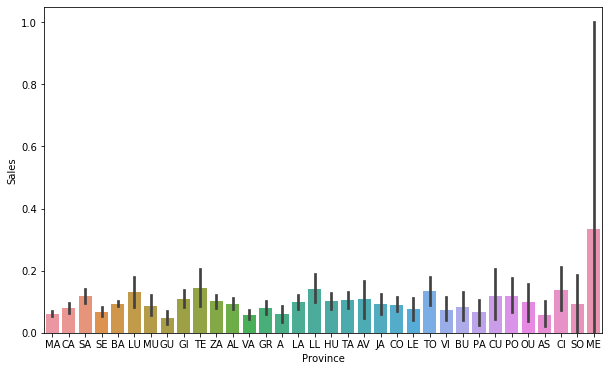

In [43]:
# Plot the distribution on Sales==1
plt.figure(figsize= [10.0, 6.0])
sns.barplot(x="Province", y="Sales", data=data_1)
plt.show()

In [44]:
# Evaluate Premium Offered and Sales as relatives values on sold only
data_1[["Estimated number of cars", "Sales"]].groupby(['Estimated number of cars'], as_index=False).mean()

,Estimated number of cars,Sales
0,None,0.090046
1,One,0.078181
2,Three,0.088000
3,two,0.069714


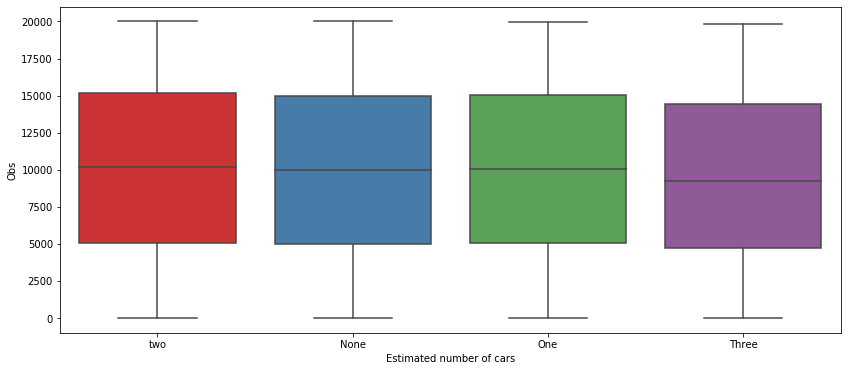

In [45]:
# Grouped boxplot
plt.figure(figsize= [14.0, 6.0])
sns.boxplot(x="Estimated number of cars", y="Obs", 
            data=data_1, palette="Set1")
plt.show()

* * *
## Final Thoughts about Data Visualization

During pattern and insight phase we discover that **customer** live in *Barcelona and Madrid* most than other province. **Wednesday** is the best day to sell, but **Sunday** is most aggressive day to call them.
Customer that have `21.85` premium product offered is `12%` sold, instead *11.12*, *14.5*. Normally **30 campaign** at least to obtain one sale.

Socio-status data, customer has indifferent `status` (Low to High), but **High** and **Very High** are customer which obtain one sale.

* * *
### Estimated time to achieve 3 Data Analysis and Data Visualization


The 5th has been achieved in `~2 hours`. We made investigation, analysis and transformation tasks.

To be continued with the 5th part,  `4a - Modeling`...